https://www.youtube.com/watch?v=tpCFfeUEGs8&t=32051s

##Introduction to neural network classification with Tensor Flow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify somenthing as one thing or another.

>>A few types of classsification problems:
* Binary classification
* Multiclass classification
* Multilable classification

##Creating data to view and fit:

In [ ]:
import tensorflow as tf
from sklearn.datasets import make_circles

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Checking features:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Checking labels:
y[:10] #only checking the 10 first ones

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

The data is a bit hard to understand at the moment, so let's visualize it:

In [ ]:
import pandas as pd


In [ ]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
# Visualizing with plot
import matplotlib.pyplot as plt

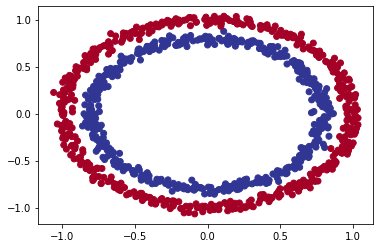

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

##Input and output shapes

In [ ]:
# Checkind features and labels shape
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
#How many samples we are working with
len(X), len(y)

(1000, 1000)

In [ ]:
#View the first example of labels and features
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

##Steps in modeling

The steps in modelling with TensorFlow are typically:

**1. Create or import a model.**

**2. Compile the model.**

**3. Fit the model.**

**4. Evaluate the model.**

In [ ]:
## USING RECURSIVE MODEL ON NON LINEAR DATA WILL NOT WORK, THIS IS FOR EXAMPLE PORPUSES ##
#Setting the random state
tf.random.set_seed(42)

#1.Creating the model using the sequential API
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

#2.Compiling the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
#3.Fiting the model
model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
# Making it learn for longer
model_1.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4890
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4960
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4470
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5050
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4970
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4800
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4790
Epoch 11/

Since we are working on a binary classification problem and our model is getting around ~50% accuracy, it's performing as if was guessing the results.

Trying to add an extra layer to see if gets better.

In [ ]:
#Setting the random state
tf.random.set_seed(42)

#1.Creating the model using the sequential API
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])

#2.Compiling the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
#3.Fiting the model
model_1.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5010
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.4960
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.4990
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4960
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.4920
Epoch 11/

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

##Improving our model

* 1.Creating a model: **we might want to add more layersor increase the number of hidden units within a layer.**

* 2.Compiling a model: **Choose a different type of optimizer fuction such as Adam(love him)**

* 3.Fitting the model: **fit the model for more epochs.**


In [ ]:
#Setting the random state
tf.random.set_seed(42)

#1.Creating the model using the sequential API
#Adding more layers
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100), #adding a layer with 100 hidden units
                               tf.keras.layers.Dense(10), #adding a layers with 10 hidden units
                               tf.keras.layers.Dense(1) #adding 1 last layer with 1 hidden unit
])

#2.Compiling the model
#changjing the optimizer to Adam
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3.Fiting the model
#putting more epochs
model_2.fit(X, y, epochs=200, verbose=0)

In [ ]:
#4.Evaluating the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932550668716431, 0.5]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features(X) and labels(y)
* Create a meshgrid of the different X values 
* Make predictions across the meshgrid
* Plot the prediction and a line between the diffent zones.

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


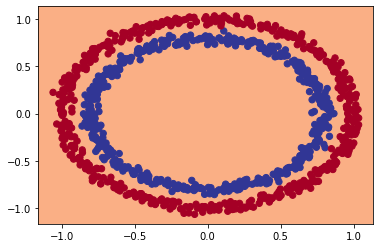

In [ ]:
# Check out the predictions our model is making 
plot_decision_boundary(model_2, X, y)

In [ ]:
model_2.predict(X)

array([[0.4931314 ],
       [0.49195573],
       [0.49188817],
       [0.4917524 ],
       [0.49392518],
       [0.49169663],
       [0.4919636 ],
       [0.4932238 ],
       [0.49332333],
       [0.4916711 ],
       [0.49269977],
       [0.49240708],
       [0.4918514 ],
       [0.4936412 ],
       [0.493768  ],
       [0.49359268],
       [0.49226928],
       [0.49355155],
       [0.49214146],
       [0.49288777],
       [0.49282235],
       [0.491463  ],
       [0.4936349 ],
       [0.49307582],
       [0.49154598],
       [0.49176314],
       [0.49204737],
       [0.49354976],
       [0.49365196],
       [0.49370116],
       [0.4933062 ],
       [0.49161285],
       [0.49200025],
       [0.49354297],
       [0.49364504],
       [0.49143127],
       [0.49172208],
       [0.49242833],
       [0.49363524],
       [0.49274197],
       [0.49295163],
       [0.49214926],
       [0.4927664 ],
       [0.49363777],
       [0.49257636],
       [0.49229726],
       [0.4938005 ],
       [0.492

In [ ]:
# Can our model be used for regression problems?
tf.random.set_seed(42)

#Creating some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

#X_regression, y_regression

In [ ]:
#Spliting our regression data into training and testing data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
#Setting the random state
tf.random.set_seed(42)

#1.Creating the model using the sequential API
#Adding more layers
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100), #adding a layer with 100 hidden units
                               tf.keras.layers.Dense(10), #adding a layers with 10 hidden units
                               tf.keras.layers.Dense(1) #adding 1 last layer with 1 hidden unit
])

#2.Compiling the model
#changjing the optimizer to Adam
model_2.compile(loss=tf.keras.losses.mae, #changing the binary loss function to mae
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3.Fiting the model
#putting more epochs
model_2.fit(X, y, epochs=200, verbose=0)

In [ ]:
#Fiting the model
#model_2.fit(X_reg_train, y_reg_train, epochs=100)

In [ ]:
#Making predictions with our trained model
#y_reg_pres = model_2.predict(X_reg_test)

#Ploting our prediction against the regression data
#plt.figure(figsize=(10,7))
#plt.scatter(X_reg_train, y_reg_train, c="b", label="Trainig data")
#plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
#plt.scatter(X_reg_test, y_reg_pres, c="r", label="Prediction")
#plt.legend()

##Non-linearity

In [ ]:
tf.random.set_seed(42)

#Creating the model
model_3 = tf.keras.Sequential([
      tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

#Compiling the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_3.fit(X, y, epochs=100) 

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

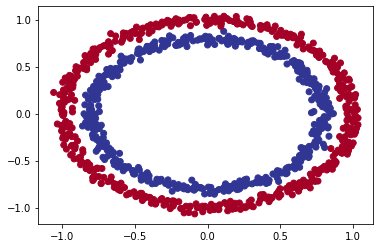

In [ ]:
#Checking the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

doing binary classifcation...


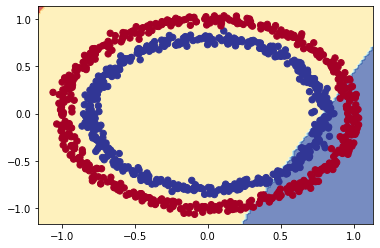

In [ ]:
#Check the decision boundary for our latest model
plot_decision_boundary(model=model_3, X=X, y=y)

##First model with non-linar activation function


In [ ]:
tf.random.set_seed(42)

#creating the model
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

#compiling the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
                metrics=["accuracy"])


In [ ]:
#fiting the model
history=model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 2.2429 - accuracy: 0.4770
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7011 - accuracy: 0.5310
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4650
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4980
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.4740
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4770
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6985 - accuracy: 0.4750
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.4950
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4780
Epoch 11/

In [ ]:
#Adding more hidden layers and hidden units within
tf.random.set_seed(42)

#better model?
model_69 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(1, activation="sigmoid") #putting sigmoid function on the output layer!!!!!!!
])

#compiling
model_69.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(0.03),
                 metrics=["accuracy"])

In [ ]:
#fiting the model
model_69.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6829 - accuracy: 0.5440
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.5880
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.7170
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.7830
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.9160
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2430 - accuracy: 0.9330
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1623 - accuracy: 0.9700
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9770
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1102 - accuracy: 0.9740
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0832 - accuracy: 0.9840
Epoch 11/

doing binary classifcation...


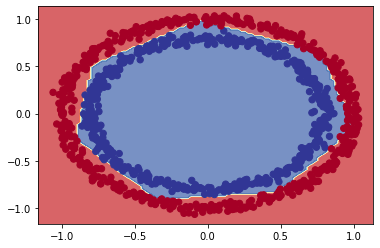

In [ ]:
#ploting
plot_decision_boundary(model=model_69, X=X, y=y)

In [ ]:
#Creating a new toy tensor
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

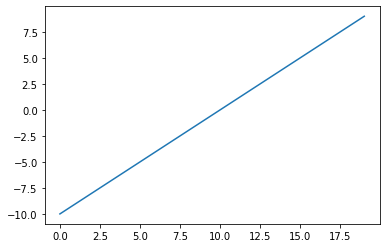

In [ ]:
#visualizing the toy tensor
plt.plot(A)

In [ ]:
#changing the data to sigmoid
def sigmoid(x):
  return 1 / (1 + tf.math.exp(-x))

In [ ]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

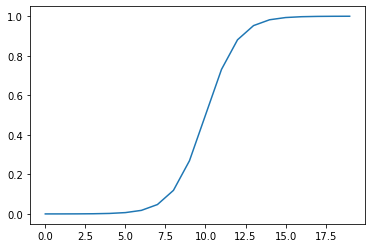

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
# Relu function
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

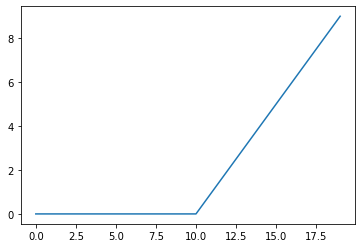

In [ ]:
plt.plot(relu(A))

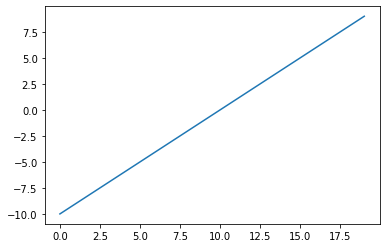

In [ ]:
plt.plot(A)

## Evaluating and improving our classification
* Creating a training and test set


In [ ]:
#Checking how many examples we have
len(X)

1000

In [ ]:
#Spliting into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
#Let's recreate a model to fit on the training data and evaluate on the testing data 
#Set random seed
tf.random.set_seed(42)

# 1.Creating the model (same as model 69)
model_666 = tf.keras.Sequential([
                                 tf.keras.layers.Dense(4, activation="relu"),
                                 tf.keras.layers.Dense(4, activation="relu"),
                                 tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2.Compiling the model
model_666.compile(loss = tf.keras.losses.binary_crossentropy,
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.03),
                  metrics=["accuracy"])

# 3.Fiting the model
history = model_666.fit(X_train, y_train, epochs=1000) #I trained for more and it got 100% accuracy im crying, around 900 epochs it gets there and stays there

Epoch 1/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5225
Epoch 2/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.6688 - accuracy: 0.5875
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.6587
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.5855 - accuracy: 0.6938
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.8000
Epoch 6/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.9212
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.2430 - accuracy: 0.9575
Epoch 8/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1767 - accuracy: 0.9638
Epoch 9/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1298 - accuracy: 0.9800
Epoch 10/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.1036 - accuracy: 0.9825

In [ ]:
#Evaluating the model
model_666.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 6.0945e-04 - accuracy: 1.0000


[0.0006094480049796402, 1.0]

doing binary classifcation...
doing binary classifcation...


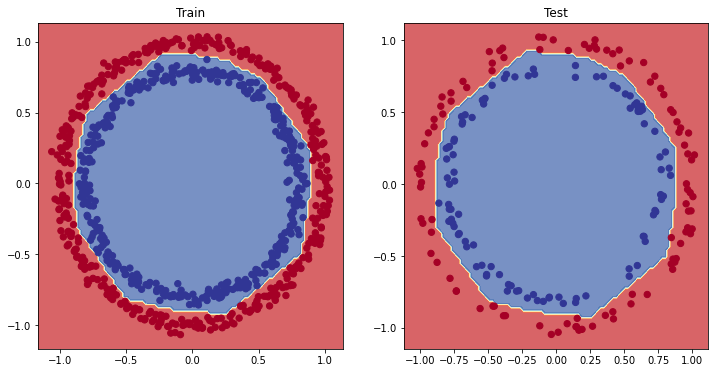

In [ ]:
#Ploting the decision boundaryes for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_666, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_666, X=X_test, y=y_test)

##Ploting the loss (or training) curves

In [ ]:
history.history

{'accuracy': [0.5224999785423279,
  0.5874999761581421,
  0.6587499976158142,
  0.6937500238418579,
  0.800000011920929,
  0.9212499856948853,
  0.9574999809265137,
  0.9637500047683716,
  0.9800000190734863,
  0.9825000166893005,
  0.9662500023841858,
  0.9837499856948853,
  0.9837499856948853,
  0.981249988079071,
  0.9674999713897705,
  0.9787499904632568,
  0.9887499809265137,
  0.9837499856948853,
  0.9800000190734863,
  0.9762499928474426,
  0.9837499856948853,
  0.9887499809265137,
  0.9850000143051147,
  0.987500011920929,
  0.9850000143051147,
  0.981249988079071,
  0.9800000190734863,
  0.981249988079071,
  0.9700000286102295,
  0.9750000238418579,
  0.9599999785423279,
  0.9574999809265137,
  0.9737499952316284,
  0.9900000095367432,
  0.9912499785423279,
  0.9862499833106995,
  0.9762499928474426,
  0.9862499833106995,
  0.987500011920929,
  0.9900000095367432,
  0.981249988079071,
  0.9762499928474426,
  0.9775000214576721,
  0.987500011920929,
  0.9900000095367432,
  0.99

In [ ]:
#Converting the history into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.683774,0.52250
1,0.668812,0.58750
2,0.646934,0.65875
3,0.585474,0.69375
4,0.488957,0.80000
...,...,...
995,0.000499,1.00000
996,0.000471,1.00000
997,0.000472,1.00000
998,0.000443,1.00000


Text(0.5, 1.0, 'Model_666 loss curves')

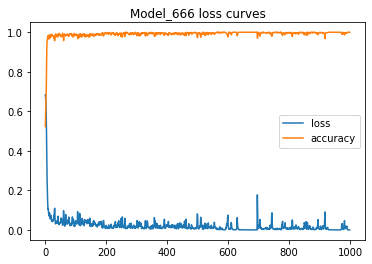

In [ ]:
#Ploting the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_666 loss curves")

**Note:** For many problems the loss function going down means the model is improving (the prediction it's making are getting closer to the ground truth labels).

##Finding the best learning rate

To find the ideal learning rate (where the loss decreases the most during training) we're are going to use the following steps:
* A learning rate **callback**: An extra piece of functionality, you can add to your model *while* is training.
* Another model 
* A modified loss curve plot.

In [ ]:
#Creating a new model
#Random seed
tf.random.set_seed(42)
#1.Bulding the model
model_16_tower = tf.keras.Sequential([
                                      tf.keras.layers.Dense(4, activation="relu"),
                                      tf.keras.layers.Dense(4, activation="relu"),
                                      tf.keras.layers.Dense(1, activation="sigmoid")
])

#2.Compiling the model
model_16_tower.compile(loss=tf.keras.losses.binary_crossentropy,
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"]
                       )

## Creating a learning rate callback ##
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

#3.Fiting the model. this time passing the lr_scheduler
history_16 = model_16_tower.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

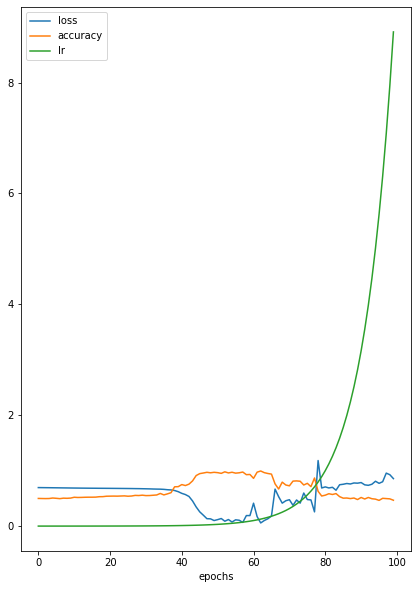

In [ ]:
#Checking the history
pd.DataFrame(history_16.history).plot(figsize=(7,10), xlabel="epochs")

In [ ]:
#Ploting the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [ ]:
len(lrs)

100

Text(0.5, 1.0, 'Learning rate vs. Loss')

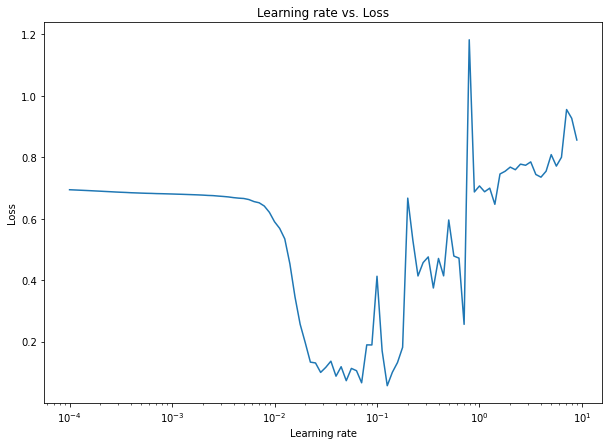

In [ ]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_16.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [ ]:
10**-2 #Aperently the best learning rate :)

0.01

In [ ]:
#Other typical learning rates ## 0.03 is still the best one ##
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
#Let's try using a higher *ideal* learning rate with the same model as before
tf.random.set_seed(42)

model_13_death = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(1, activation="sigmoid")
])
#Compiling
model_13_death.compile(loss=tf.keras.losses.binary_crossentropy,
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), #0.03 is still better :v
                       metrics=["accuracy"]
)

#Fiting
history_13 = model_13_death.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/

In [ ]:
#Evaluating model 13:
model_13_death.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 0.9950


[0.01856580562889576, 0.9950000047683716]

In [ ]:
#Evaluating model 16 on the test data:
model_16_tower.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4950


[0.6933157444000244, 0.4950000047683716]

In [ ]:
#Evaluating model 69 on the test data:
model_69.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0433 - accuracy: 0.9800


[0.0432731918990612, 0.9800000190734863]

In [ ]:
#Model 666 evaluation:
model_666.evaluate(X_test, y_test) #DING DING DING DING DING <<<<<<

7/7 [==============================] - 0s 2ms/step - loss: 6.0945e-04 - accuracy: 1.0000


[0.0006094480049796402, 1.0]

doing binary classifcation...
doing binary classifcation...


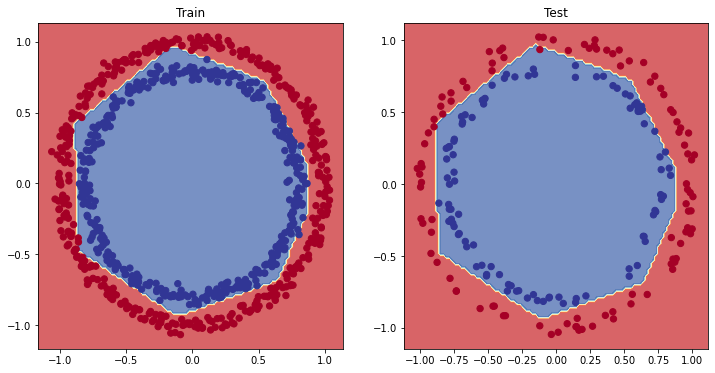

In [ ]:
#Ploting the decision boundariesfor the training and test sets:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_13_death, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_13_death, X=X_test, y=y_test)
plt.show()

##More classification evaluation methods
>> Along side visualizing our models results as much as possible, there are a handfull of other classification evaluation methods and metrics we should be familiar with:

* Accuracy
* Precision
* Recall
* F1-Score
* Confusion matrix
* Classifcation report (from scikit-learn) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html


In [ ]:
# Checking the accuracy of our model
loss, accuracy = model_666.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 6.0945e-04 - accuracy: 1.0000
Model loss on the test set: 0.0006094480049796402
Model accuracy on the test set: 100.00%


##How about a confusion matrix? 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html



In [ ]:
#Importing confusion matrix:
from sklearn.metrics import confusion_matrix

In [ ]:
#Making predictions
y_pred = model_666.predict(X_test)

In [ ]:
#Converting our prediction values to binary format
y_preds = tf.round(y_pred)
y_preds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
#Creating the confusion matrix
confusion_matrix(y_test, y_preds)

array([[101,   0],
       [  0,  99]])

##Making a prettier confusion matrix

>> Ploting it https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

In [ ]:
import itertools

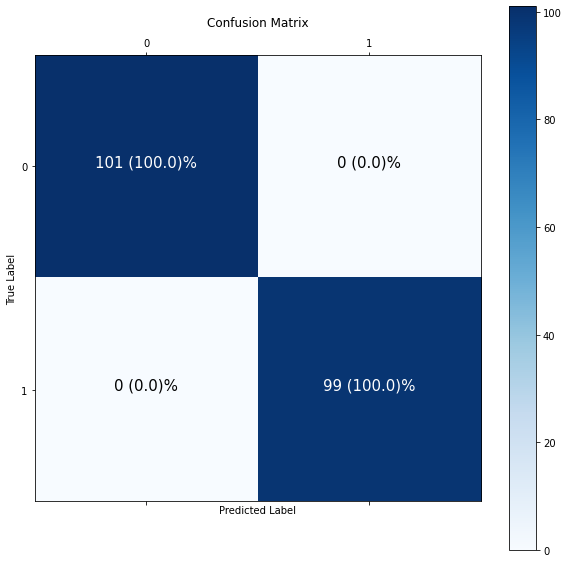

In [ ]:
figsize = (10,10)

#Creating the confusion matrix
cm = confusion_matrix(y_test, y_preds)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #Normalizing the confusion matrix
n_classes = cm.shape[0]

#Making it prettier
fig, ax = plt.subplots(figsize = figsize)

#Creating a matrix plot:
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#Creating the classes:
classes = False

if classes:
  labels = classes
else: 
  labels = np.arange(cm.shape[0])

#Labeling the axis:
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels
       )

#Treshold for different colors
treshold = (cm.max() + cm.min()) / 2

#Ploting the text on each cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f})%",
           horizontalalignment="center",
           color="white" if cm[i,j] > treshold else "black",
           size=15)

##Working with a larger example (multiclass classification)

  To practice multiclass classification, we're going to buld a neural network to classify images of different items of clothing.

In [ ]:
#Importing the dataset from keras
from tensorflow.keras.datasets import fashion_mnist

#The data has already been split up into train sets and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() #(train_data, train_label), (test_data, test_label)

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#Getting the first training example
print(f"Training sample:\n{x_train[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
#Showing the first lable example:
print(f"Testing sample:\n{y_train[0]}\n")

Testing sample:
9



In [ ]:
#Visualizing the data shape
x_train[0].shape, y_train[0].shape # y is a scaelar, only one dimension

((28, 28), ())

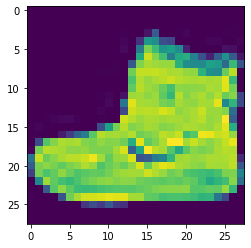

In [ ]:
#Ploting a single sample
plt.imshow(x_train[0])

In [ ]:
#Indexing the labels description
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

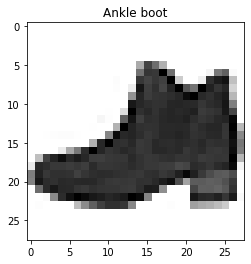

In [ ]:
#Ploting an image example and its label
plt.imshow(x_train[15], cmap=plt.cm.binary)
plt.title(class_names[y_train[15]])

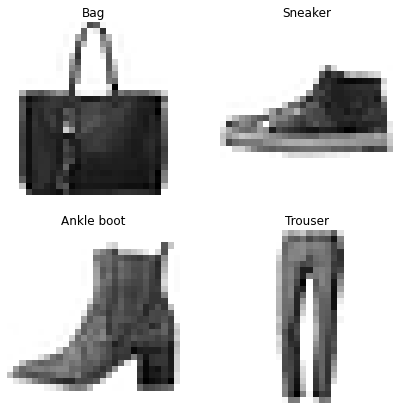

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(x_train)))
  plt.imshow(x_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

## Building a multi-class classification model
>> For the multi-class model we can use a similar architecture as the binary classificatio model, however, not everything such as:
* Input shape : (28, 28) -> one image, use, `Flatten` on the first layer so there's no shape error
* Output shape : 10 -> one per class of clothing
* Output activation fucntion : `softmax`
* Loss function : `tf.keras.losses.CategoricalCrossentropy` (if hot encoded, `SparseCategoricalCrossentropy` otherwise


In [ ]:
tf.one_hot(y_train[:10], depth=10)


<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
tf.random.set_seed(42)

#Bulding the model
model_multiclass = tf.keras.Sequential([
                                        tf.keras.layers.Flatten(input_shape=(28,28)), ##data needs to be flatten from(28,28) to (None, 784)##
                                        tf.keras.layers.Dense(4, activation="relu"),
                                        tf.keras.layers.Dense(4, activation="relu"),
                                        tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax) ##10 is the labels shape##
])


In [ ]:
#Compiling the model
model_multiclass.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["accuracy"])

In [ ]:
#Fiting the model
#non_norm_history = model_multiclass.fit(x_train, tf.one_hot(y_train, depth=10), epochs=200, validation_data=(x_test, tf.one_hot(y_test, depth=10)))

In [ ]:
model_multiclass.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 4)                 3140      
                                                                 
 dense_33 (Dense)            (None, 4)                 20        
                                                                 
 dense_34 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Checking the min and max valuesfrom the training data
x_train.min(), x_train.max()

(0, 255)

Neural networks prefer data to be scaled (also called normalized), this means they need the numbers to be between 0 and 1.

In [ ]:
#We can get our training and testing data between 0 and 1 by dividing by the maximum
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [ ]:
x_train_norm.min(), x_train_norm.max()

(0.0, 1.0)

In [ ]:
##NORMALIZED DATA##
tf.random.set_seed(42)
#Building the model
normal_model = tf.keras.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(4, activation="relu"),
                                    tf.keras.layers.Dense(4, activation="relu"),
                                    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

#Compiling
normal_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

#Fiting
#norm_history = normal_model.fit(x_train_norm, tf.one_hot(y_train, depth=10), epochs=200, validation_data=(x_test_norm, tf.one_hot(y_test, depth=10)))

> :**Note:** The same model with 

In [ ]:
#Ploting the non_normalized data model loss curve
#pd.DataFrame(non_norm_history.history).plot(title="Non normalized data")

#Ploting normalized data model loss curve
#pd.DataFrame(norm_history.history).plot(title="Normalized data")

> **Note:** The same model with even slightly different data can produce really different results (better or worse). So when comparing models it's important to make sure we're comparing then in the same criteria (e.g same architecture but differnt data, or, same data and different architecture).


##Finding the ideal learning rate

In [ ]:
#Creating another model I guess 0.0
tf.random.set_seed(42)

#Building the model
model_multiclass_2 = tf.keras.Sequential([
                                          tf.keras.layers.Flatten(input_shape=(28,28)),
                                          tf.keras.layers.Dense(4, activation="relu"),
                                          tf.keras.layers.Dense(4, activation="relu"),
                                          tf.keras.layers.Dense(10, activation="softmax")
])
#Compiling the model
model_multiclass_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["accuracy"]
                           )

#Learning the best learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
#Fiting the model
find_lr_history = model_multiclass_2.fit(x_train_norm,
                                        y_train,
                                        epochs=40,
                                        validation_data=(x_test_norm, y_test),
                                        callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

Text(0.5, 1.0, 'Finding the ideal learning rate')

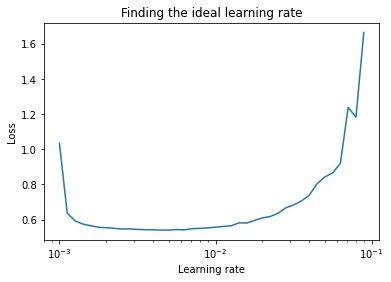

In [ ]:
#Ploting the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate") 

In [ ]:
10**-3 ##It apears to be 0.001 ugh that's the default value, thanks for nothing c:

0.001

In [ ]:
##AGAIN##
#Creating another model I guess 0.0
tf.random.set_seed(42)

#Building the model
model_multiclass_3 = tf.keras.Sequential([
                                          tf.keras.layers.Flatten(input_shape=(28,28)),
                                          tf.keras.layers.Dense(4, activation="relu"),
                                          tf.keras.layers.Dense(4, activation="relu"),
                                          tf.keras.layers.Dense(10, activation="softmax")
])
#Compiling the model
model_multiclass_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                           metrics=["accuracy"]
                           )
#Fiting the model
finded_lr_history = model_multiclass_3.fit(x_train_norm,
                                         y_train,
                                         epochs=40,
                                         validation_data=(x_test_norm, y_test))
                                         

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

##Evaluating the multi-class model

* **Evaluate its performance on other multi-class metrics (such as a confusion matrix).**
* **Asses some of its predictions trough visualizations.**
* Improve its results by training for longer or changing the architecture.
* Saving and exporting for use in an application

In [ ]:
#Creating a confusion matrix:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrics(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  #Creating the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #Normalizing the confusion matrix
  n_classes = cm.shape[0]

  #Making it prettier
  fig, ax = plt.subplots(figsize = figsize)

  #Creating a matrix plot:
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #Set labels to be classes
  if classes:
    labels = classes
  else: 
    labels = np.arange(cm.shape[0])

  #Labeling the axis:
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
        )
  
  #x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjusting label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #Treshold for different colors
  treshold = (cm.max() + cm.min()) / 2

  #Ploting the text on each cell
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f})%",
            horizontalalignment="center",
            color="white" if cm[i,j] > treshold else "black",
            size=15)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#Making some predictions
y_probs = model_multiclass_3.predict(x_test_norm)

#Viewing the first 5 predictions
y_probs[:5]

array([[1.78801834e-10, 8.59335103e-11, 1.46917664e-05, 5.13161808e-07,
        1.81152336e-05, 2.97060341e-01, 4.20026289e-08, 4.38645892e-02,
        4.03015967e-03, 6.55011594e-01],
       [1.65367328e-05, 3.77228664e-16, 9.07316446e-01, 7.29073406e-07,
        2.47242767e-02, 4.15087470e-17, 6.74995705e-02, 0.00000000e+00,
        4.42385790e-04, 1.77472556e-15],
       [4.33511450e-05, 9.98505235e-01, 1.06210706e-07, 1.42850075e-03,
        1.54846366e-05, 6.91499768e-22, 7.37811524e-06, 1.22946607e-16,
        5.29575495e-08, 6.05440481e-12],
       [4.30087748e-05, 9.96566236e-01, 7.15737315e-07, 3.24998843e-03,
        1.19078315e-04, 2.16415290e-19, 2.04281223e-05, 5.03702372e-14,
        6.17275475e-07, 1.14019505e-09],
       [1.47298977e-01, 2.39545761e-06, 1.33107737e-01, 1.01817297e-02,
        3.32404375e-02, 4.55808943e-18, 6.75670624e-01, 2.75189509e-29,
        4.98094480e-04, 1.62312739e-14]], dtype=float32)

In [ ]:
class_names[tf.argmax(y_probs[0])]

'Ankle boot'

In [ ]:
tf.argmax(y_probs[2])

<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [ ]:
y_test[2]

1

In [ ]:
#Converting all the predictions probabilities into integers
y_preds = y_probs.argmax(axis=1)

#The first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

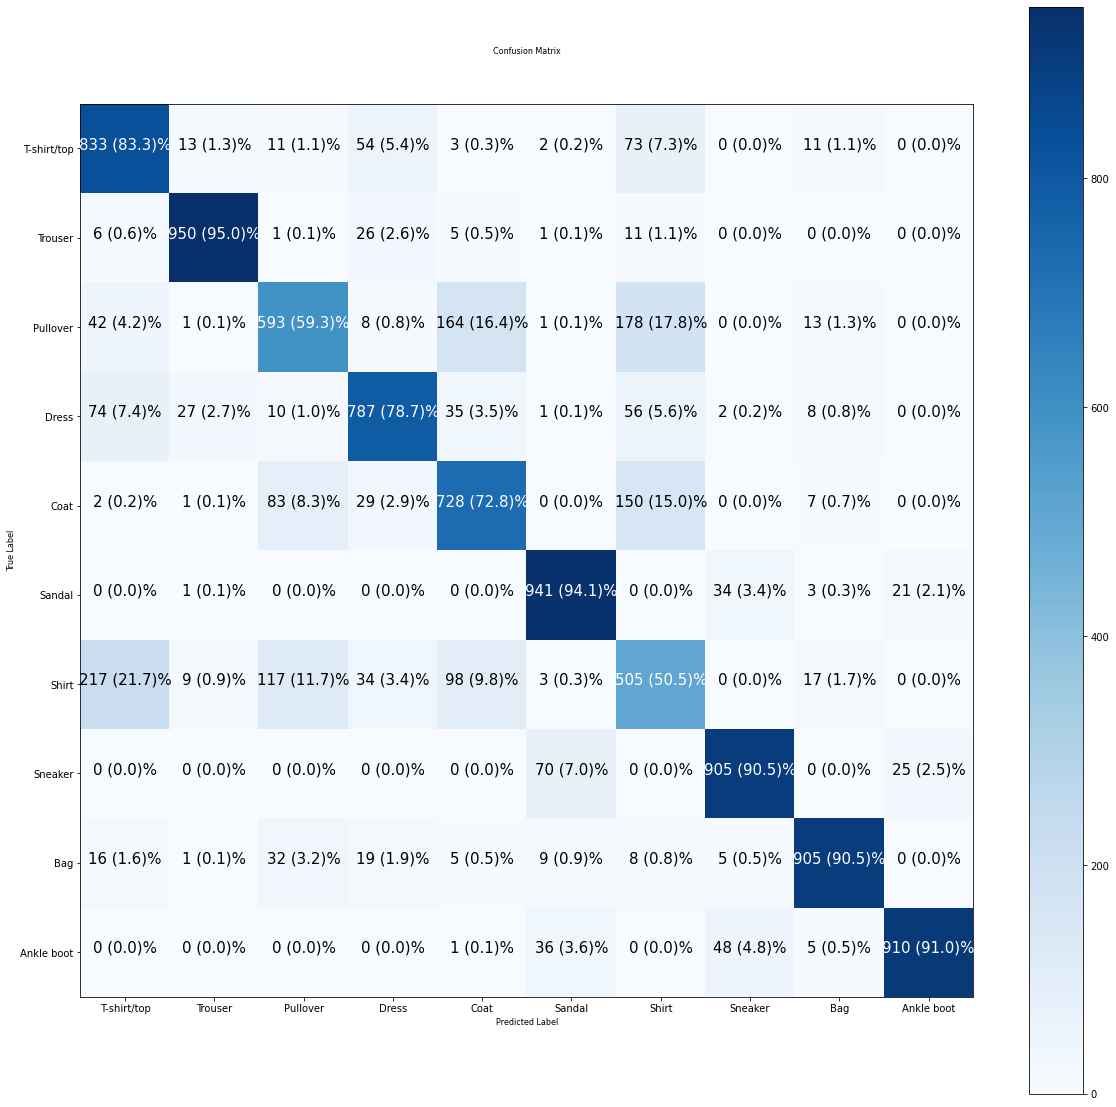

In [ ]:
make_confusion_matrics(y_true=y_test, 
                       y_pred=y_preds,
                       classes=class_names, 
                       figsize=(20,20),
                       text_size=8)